In [1]:
import numpy as np
import pandas as pd
from Classifier import Classifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing as pre
from sklearn.impute import SimpleImputer

### Reading Data

In [2]:
data = pd.read_csv('Cancer.csv')

### Getting Labels

In [3]:
y = data.diagnosis

### Taking a look at the data

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Droping unwanted colums

In [5]:
list = ['Unnamed: 32', 'id', 'diagnosis']
data = data.drop(list, axis=1)

### Checking if there is null values

In [6]:
data.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### no null values
### lets examine the data

In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Some columns have zero values, let's check how many rows have zero values

In [8]:
len(data[ (data['concavity_mean']==0) | (data['concave points_mean']==0) | 
         (data['concavity_worst']==0) | (data['concave points_worst']==0)])

13

### 13 rows wont affect the result that much let's leave them

### let's check the scaling

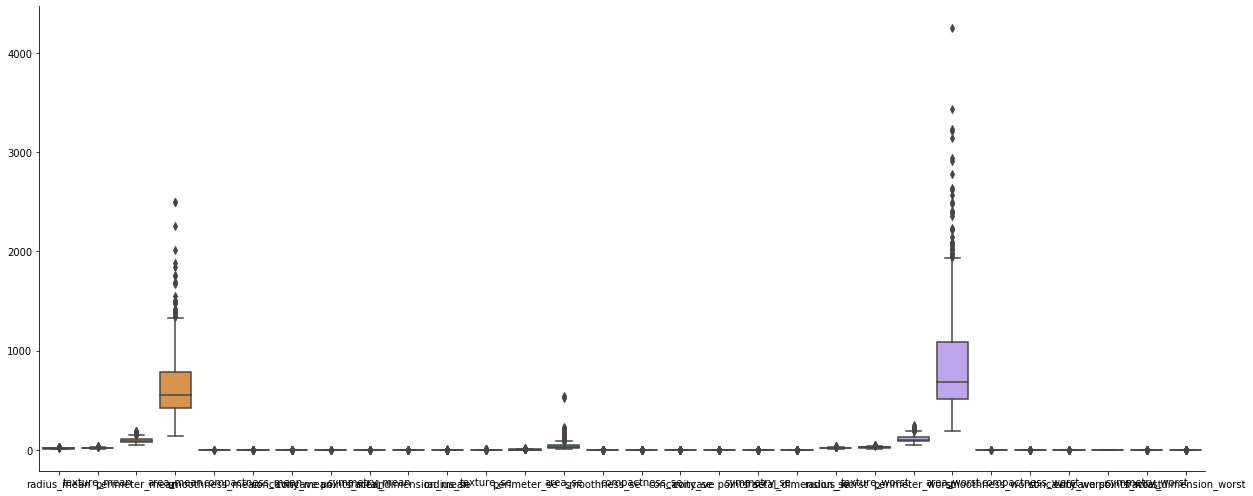

In [9]:
sns.catplot(data=data, kind='box', height=7, aspect=2.5)

### area columns are a little large lets fix that

### including needed part of our class

In [10]:
class Preprocessing:
    def __init__(self, data):
        self.data = data
    
    def standardScale(self, with_mean=True, with_std=True):
        stdScaler = pre.StandardScaler(with_mean=with_mean, with_std=with_std)
        self.data = stdScaler.fit(self.data).transform(self.data)
        return self
    
    def getResult(self):
        return self.data

### using standardscale to fix scaling

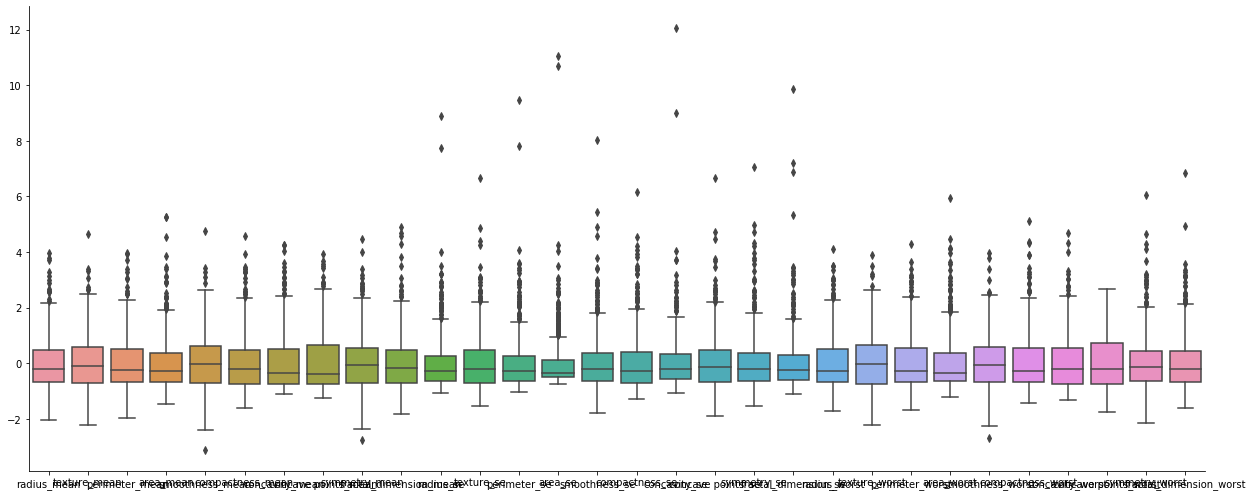

In [11]:
data_scaled = Preprocessing(data).standardScale().getResult()
data = pd.DataFrame(data_scaled, columns = data.columns)
sns.catplot(data=data, kind='box', height=7, aspect=2.5)

### looks good let's train with Random forest

### first let's get our class

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

class Classifier:
    def __init__(self, method):
        if(method == 'BAYES'):
            self.clf = GaussianNB()
        elif(method == 'DTREE'):
            self.clf = DecisionTreeClassifier()
        elif(method == 'KNN'):
            self.clf = KNeighborsClassifier()
        elif(method == 'RF'):
            self.clf = RandomForestClassifier()
        else:
            #picking bayes as default classifier if input invalid
            self.clf = GaussianNB()

    def fit(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, X_test):
        return self.clf.predict(X_test)

    def score(self, X_test, y_test):
        return self.clf.score(X_test, y_test)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)
clf = Classifier('RF')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\lilwiz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9590643274853801

### we have very good score so we are done